Lab 6
Kun Lee, partner: Lexie Peterson

Setup:

In [1]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal
from scipy import stats

plt.rcParams["figure.figsize"] = (20,15)

d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)
plt.rcParams["figure.figsize"] = (50,50)

Fake background:

In [29]:
x = np.linspace(0,999,1000)
background = scipy.stats.poisson.pmf(x,100)

5 sigma sensitivity threshold:

In [15]:
scipy.stats.norm.sf(5)

2.8665157187919333e-07

In [11]:
1/3500000

2.857142857142857e-07

In [13]:
scipy.stats.poisson.isf(scipy.stats.norm.sf(5),100)

154.0

In [14]:
scipy.stats.poisson.sf(154,100)

2.123903111645013e-07

Using the "1 in 3.5 million" approach, we find that the 5 sigma sensitivity threshold is 154.

Now we'll make a bunch of simulated signals. The lab says to make it between 8 - 30 sigma so we'll choose 15 sigmas. 

In [52]:
bg = scipy.stats.poisson.rvs(100,size=1000)
signal = scipy.stats.poisson.isf(scipy.stats.norm.sf(15),100)
#fig, ax = plt.subplots(2,1)
#ax[0].hist(background, density=True)
#ax[1].hist(bg,density=True)
#plt.show()
signal

nan

Oh no, Python broke. Basically, at 15 sigmas we're getting a really small number from sf (e-51) so I'm guessing isf doesn't like that. Trial and error:

In [68]:
scipy.stats.poisson.sf(283,100)

5.359612604812223e-51

In [55]:
scipy.stats.norm.sf(15)

3.6709661993126986e-51

This seems close enough in terms of orders of magnitude. So after receiving some clarification, this is the approach we'll be taking: Populate an array with Poisson random values. In lecture this was done with an array of zeroes + noise + signal, but our mean isn't 0 so we'll use an array of poisson rvs instead. After that, we'll add the signal so some values in the array are 100 (random variable) + 183 = 283, except that we don't get one spike, we get a distribution around the 15 sigma area. The specific values in the array that we choose to have 183 added to them (and how many we pick) are picked randomly following a random normal distribution that has a mean of picking 1 every 20 values.

In [184]:
signal = 183
import math
copy = bg.copy()
for i in range(1000):
    #if i % 20 == math.floor(scipy.stats.norm.rvs(loc=10)):
    if i % math.floor(scipy.stats.norm.rvs(loc=20)) == 0:
        copy[i] = copy[i] + 183

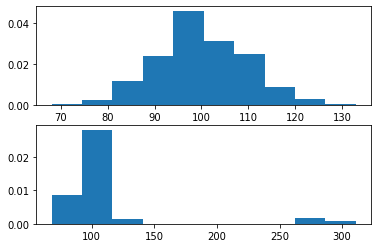

In [185]:
fig, ax = plt.subplots(2,1)
ax[0].hist(bg, density=True,)
ax[1].hist(copy,density=True)
plt.show()

Our signal shows up bright and clear.

More resolution: 

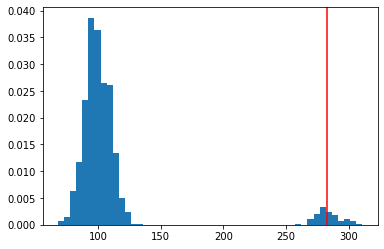

In [187]:
fig, ax = plt.subplots(1,1)
ax.hist(copy,density=True,bins=50)
ax.axvline(283,color='r')
plt.show()

In terms of how bright the signal appears to be, it has a peak strength of about 0.005. In terms of shape, it looks like a poisson distribution which is the only logical conclusion because the original distribution was poisson and the signal is formed by adding 183 to some elements of the poisson distribution. In essence, a (random) subset of a poisson distribution is also poisson in nature.

The signal is symmetric in the sense that there's only 1 peak (283) because we only injected 1 value . In that regard it's also not biased because of that same reasoning (i.e. the observed signal isn't stronger or weaker than the injected signal, it's exactly the same as the injected signal.)

In [109]:
copy

array([103, 102, 110, ..., 283, 283, 283])

There our signal is. However, it seems like it's biased on the histogram (the red line is plotted at 283 and the blue bar representing the signal seems to be a little to the left of it (which seems biased and non symmetric) but I think that's just a visual artefact, probably because of how binning is done by Python's histogram function. 

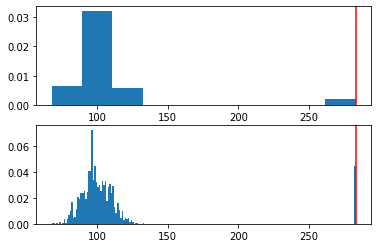

In [116]:
fig, ax = plt.subplots(2,1)
ax[0].hist(copy,density=True,bins=10)
ax[1].hist(copy,density=True,bins=200)
ax[0].axvline(283,color='r')
ax[1].axvline(283,color='r')
plt.show()

For a more persuasive illustration of the previous explanation about binning, here are some plots at different bin sizes. There seems to be an inherent negative bias in the histogram function (my signal at 283 is now left biased towards what looks like 260-283). But that's just the histogram; the data isn't biased.

Now we make a suite of simulated signals.

In [136]:
scipy.stats.norm.sf(30)

4.906713927147908e-198

In [135]:
signal3 = scipy.stats.poisson.sf(530,100)
signal3

3.0507735039998975e-200

So to get a range of signals from 0 sigmas to 30 sigmas, our values are from 100 to around 530 (adding values from 0 to 430.

In [296]:
signal = [0,50,100,150,200,250,300,350,400,450]
import math
copy2 = bg.copy()
copy3 = []
copy4 = np.zeros(1000)
for i in range(1000):
    #if i % 20 == math.floor(scipy.stats.norm.rvs(loc=10)):
    if i % math.floor(scipy.stats.norm.rvs(loc=20)) == 0:
        sig = signal[np.random.randint(0,high=10)]
        copy2[i % 999] = copy2[i % 999] + sig
        copy3.append(sig)
        copy4[i % 999] = copy4[i % 999] + sig
        
for i in range(1000):
    #if i % 20 == math.floor(scipy.stats.norm.rvs(loc=10)):
    if i % math.floor(scipy.stats.norm.rvs(loc=20)) == 3:
        sig = signal[np.random.randint(0,high=10)]
        copy2[i % 999] = copy2[i % 999] + sig
        copy3.append(sig)
        copy4[i % 999] = copy4[i % 999] + sig
    
len(copy3)

for i in range(1000):
    #if i % 20 == math.floor(scipy.stats.norm.rvs(loc=10)):
    if i % math.floor(scipy.stats.norm.rvs(loc=20)) == 7:
        sig = signal[np.random.randint(0,high=10)]
        copy2[i] = copy2[i] + sig
        copy3.append(sig)
        copy4[i % 999] = copy4[i % 999] + sig
    
for i in range(1000):
    #if i % 20 == math.floor(scipy.stats.norm.rvs(loc=10)):
    if i % math.floor(scipy.stats.norm.rvs(loc=20)) == 17:
        sig = signal[np.random.randint(0,high=10)]
        copy2[i % 999] = copy2[i % 999] + sig
        copy3.append(sig)
        copy4[i % 999] = copy4[i % 999] + sig
len(copy3)

196

In [244]:
copy4

array([450., 250., 350., 450.,   0., 200., 450.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 200.,   0., 150.,   0., 400.,   0.,
       250.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 450.,
         0.,   0.,   0., 250.,   0.,   0.,   0., 300.,   0., 400.,   0.,
         0.,   0., 250.,   0.,   0.,   0.,   0., 450.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 200., 200., 300.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 150.,   0., 350., 300.,   0.,   0., 400.,   0.,   0.,   0.,
         0., 350., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 300.,   0., 500.,   0.,   0.,   0.,   0.,  50.,   0.,
         0., 350.,   0.,   0.,   0.,   0.,   0.,  50.,   0.,   0., 100.,
         0., 250.,   0.,   0.,   0., 250.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 150.,
         0., 500.,   0.,   0., 400.,   0., 350.,   

We are simulating 10 signals, from 0 sigmas to 30 sigmas. They are spaced 50 (raw value) apart.

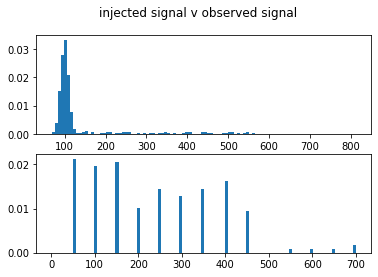

In [297]:
fig, ax = plt.subplots(2,1)
ax[0].hist(copy2,density=True,bins=100)
ax[1].hist(copy4,density=True,bins=100,range=[1,copy4.max()])
plt.suptitle("injected signal v observed signal")
plt.show()

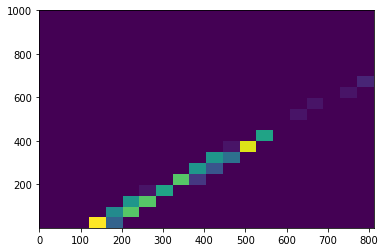

In [298]:
fig, ax = plt.subplots(1,1)

ax.hist2d(copy2,copy4,bins=20, range=[[0,copy2.max()],[1,1000]])
plt.show()
#background line on left (background dist) w faint diagonal
#1-5 signal strength example
#a few different signal arrays
#add 190 not 90. So its biased cuz we add 190 and we get 290.